In [20]:
#necessary packages and modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [33]:
#loading in all numerical past stock data
stock_data = pd.read_csv('maama.csv')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

In [5]:
#some dataset info
print(f'\nFIRST FIVE ROWS\n{stock_data.tail()}')
print(f'\nSHAPE: {stock_data.shape}')


FIRST FIVE ROWS
            Date        Open        High         Low       Close   Adj Close  \
32495 2024-09-30  164.779999  167.360001  164.639999  167.190002  167.190002   
32496 2024-10-01  168.860001  170.440002  165.899994  168.419998  168.419998   
32497 2024-10-02  167.759995  168.880005  166.250000  167.309998  167.309998   
32498 2024-10-03  165.820007  167.910004  165.369995  167.210007  167.210007   
32499 2024-10-04  169.339996  169.550003  166.960007  168.559998  168.559998   

         Volume Ticker  
32495  14070100   GOOG  
32496  18629500   GOOG  
32497  12745000   GOOG  
32498  11004300   GOOG  
32499  11422100   GOOG  

SHAPE: (32500, 8)


In [22]:
#checking nulls
stock_data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Ticker       0
dtype: int64

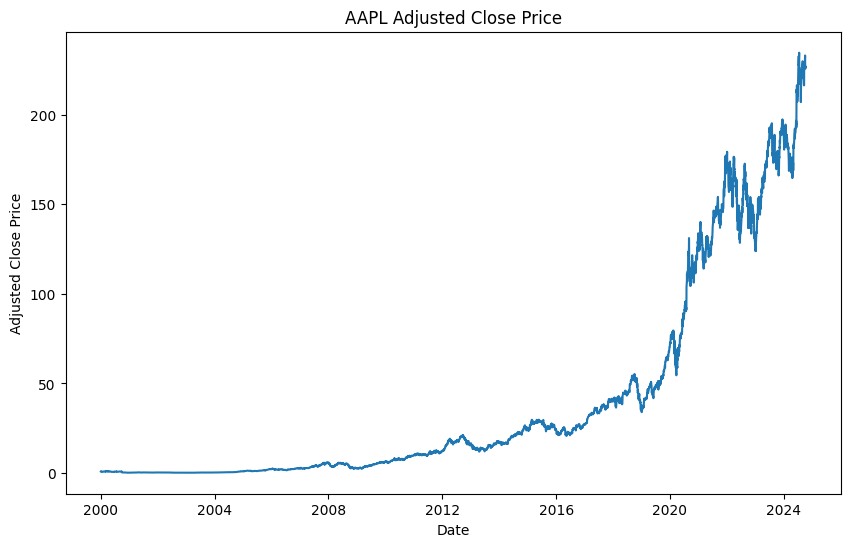

In [23]:
#specific company data
aapl_data = stock_data[stock_data['Ticker'] == 'AAPL']
msft_data = stock_data[stock_data['Ticker'] == 'MSFT']
amzn_data = stock_data[stock_data['Ticker'] == 'AMZN']
meta_data = stock_data[stock_data['Ticker'] == 'META']
nflx_data = stock_data[stock_data['Ticker'] == 'NFLX']
goog_data = stock_data[stock_data['Ticker'] == 'GOOG']


#company data methods
def apple_data():
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=aapl_data, x='Date', y='Adj Close')

    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.title('AAPL Adjusted Close Price')

    plt.show()
    
def microsoft_data():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=msft_data, x='Date', y='Adj Close', edgecolor='none')

    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.title('MSFT Adjusted Close Price')

    plt.show()
    
def amazon_data():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=amzn_data, x='Date', y='Adj Close', edgecolor='none')

    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.title('AMZN Close Price')

    plt.show() 
    
def meta_data():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=meta_data, x='Date', y='Adj Close', edgecolor='none')

    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.title('META Adjusted Close Price')

    plt.show()
    
def netflix_data():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=nflx_data, x='Date', y='Adj Close', edgecolor='none')

    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.title('NFLX Adjusted Close Price')

    plt.show()

def google_data():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=goog_data, x='Date', y='Adj Close', edgecolor='none')

    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.title('GOOG Adjusted Close Price')

    plt.show()

apple_data()

do the null checking (DONE)
do the pca visualization
do linear regression, see mee and r^2
do ridge regression
neural networks
sentiment analysis
research proposal

In [29]:
#the pca plot
from sklearn.decomposition import PCA

def plot_pca_for_ticker(ticker_to_display):
  
    #establish cleaned data
    numeric_data = stock_data.drop(columns=['Date', 'Ticker'])
    
    #create pca plot
    pca = PCA(n_components=2)  # Reduce to 2 components for visualization
    pca_components = pca.fit_transform(numeric_data)
    
    #___________
    pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
    pca_df['Ticker'] = stock_data['Ticker'].values
    
    #company to be analyzed
    ticker_data = pca_df[pca_df['Ticker'] == ticker_to_display]
    
    #plot results
    plt.figure(figsize=(10, 8))
    plt.scatter(ticker_data['PC1'], ticker_data['PC2'], label=ticker_to_display, alpha=0.7)
    plt.title(f"PCA of Stock Data for Ticker: {ticker_to_display}")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

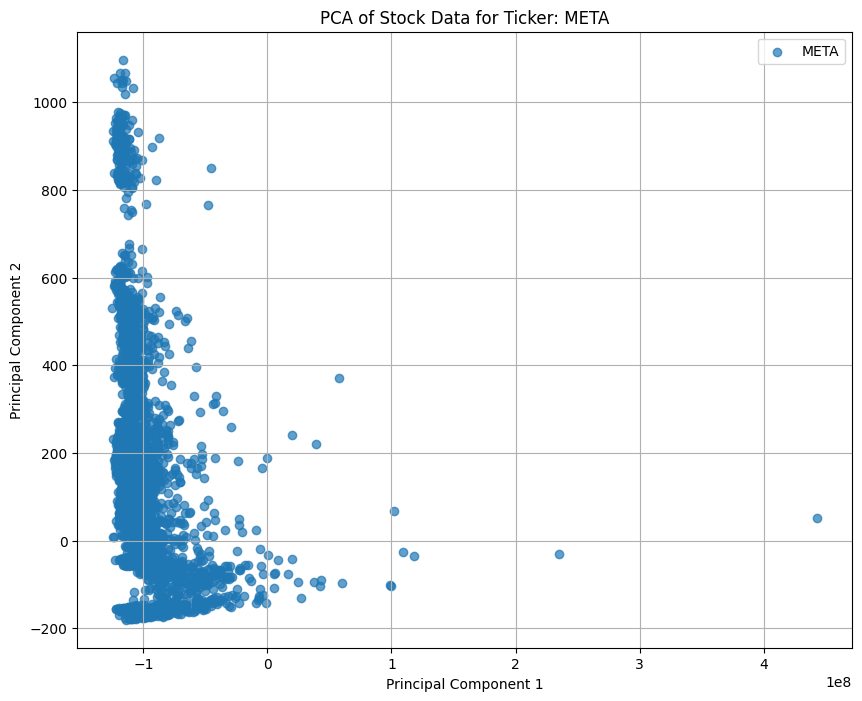

In [30]:
#the actual function
plot_pca_for_ticker('META')

In [37]:

from sklearn.linear_model import LinearRegression

def test_linear(company):
    
    #filters stock_data by company
    data = stock_data[stock_data['Ticker'] == company].drop(['Date', 'Ticker'], axis=1)
    data = pd.DataFrame(data)
    
    #adds next close feature
    data['Next Close'] = data['Close'].shift(-1)
    
    #drops last row due to no next close
    data.drop(data.tail(1).index,inplace=True)
    
    #seperating the inputs from outputs
    y = data['Next Close']
    X = data.drop('Next Close', axis=1)
    
    #train and tests
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #initialization
    linear_model = LinearRegression()
    
    #fitting
    linear_model.fit(X_train, y_train)
    
    #prediciting
    predictions = linear_model.predict(X_test)
    
    #analyzing
    from sklearn.metrics import mean_absolute_error, r2_score
    print(f'{company}:\nMean Squared Error:{mean_absolute_error(y_test, predictions)}, R^2:{r2_score(y_test, predictions)}')


test_linear('AAPL')



NameError: name 'company' is not defined

In [36]:
def all_companies():
    all_companies_ids = ['AAPL','MSFT','AMZN','META','NFLX','GOOG']
    
    for id in all_companies_ids:
        test_linear(id)
        print()
        
all_companies()

AAPL
Mean Squared Error:0.5219372885806035, R^2:0.9995743916825619

MSFT
Mean Squared Error:1.0925492429542385, R^2:0.9995220204103722

AMZN
Mean Squared Error:0.5954409292462232, R^2:0.9994258640266306

META
Mean Squared Error:2.846966316562431, R^2:0.9984010457299022

NFLX
Mean Squared Error:2.87088161696422, R^2:0.9984684638689494

GOOG
Mean Squared Error:0.5828485853138962, R^2:0.9993435029795299



In [ ]:

from sklearn.linear_model import Ridge

def test_linear(company):
    
    #filters stock_data by company
    data = stock_data[stock_data['Ticker'] == company].drop(['Date', 'Ticker'], axis=1)
    data = pd.DataFrame(data)
    
    #adds next close feature
    data['Next Close'] = data['Close'].shift(-1)
    
    #drops last row due to no next close
    data.drop(data.tail(1).index,inplace=True)
    
    #seperating the inputs from outputs
    y = data['Next Close']
    X = data.drop('Next Close', axis=1)
    
    #train and tests
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #initialization
    linear_model = LinearRegression()
    
    #fitting
    linear_model.fit(X_train, y_train)
    
    #prediciting
    predictions = linear_model.predict(X_test)
    
    #analyzing
    from sklearn.metrics import mean_absolute_error, r2_score
    print(f'{company}:\nMean Squared Error:{mean_absolute_error(y_test, predictions)}, R^2:{r2_score(y_test, predictions)}')


test_linear('AAPL')
